# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [1]:
#Project title
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:SeaGreen;font-family:verdana;">Seoul Bike Sharing Demand Prediction(Supervised ML-Regression) </h1></b></marquee>


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

<html>
<img src="https://cdn.dribbble.com/users/362212/screenshots/2831376/biker.gif" width="400" height="300" alt="bike">
</html>

## <b> Data Description </b>



The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### <b style="color:SeaGreen;font-family:verdana">Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


## Project Flowchart:



1. Loading data and Diagnosing the data
2. Data Filtering 
3. EDA of Row data to understand inside correlations
4. Feature Engineering
5. Feature Selection : we are not use much beacuase of limited features in our data(only one feature elemenate using hitmap to escalate multicoliniarity issue)
6. Model Building
7. Model Training and Testing
8. Model Evalution & Hyper Perameter tuning
9. Model Deployment

----

## **1. Import Libraries and Data**


In [75]:
# Import necessary libraries

import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree

import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

###*1.1 _ Data Loading*

We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [76]:
# Read the csv file
data=pd.read_csv("data/XTrain.csv")
data['Rented Bike Count'] = pd.read_csv('data/yTrain.csv')['Rented Bike Count']

#####1.1.1 _ First Look Data and Identify Features

The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions

|Column| Data details inside column |
|------|----------------------------|
|Date| Date of Rented Bike | 
|Rented Bike count | Number of total rentals|
|Hour | Hours of the day |
|Temperature(°C)| Weather Temperature in °C |
|Humidity(%)| Humidity of the day in %|
|	Wind speed (m/s)| Wind speed in m/s |
|Visibility (10m)| Atmospherical Visibility within 10 𝑚 range |
|Dew point temperature(°C) | Dew Point Temperature - T dp in °C |
|Solar Radiation (MJ/m2) | Indicate light and energy that comes from the sun in MJ/m2 | 
|Rainfall(mm)	| Rain fall in mm |
|Snowfall (cm) | Snow fall in cm |
|Seasons| Autumn, Spring, Summer, Winter |
|Holiday|Whether the day is considered a holiday|	
|Functioning Day|Whether the day is neither a weekend nor holiday|



Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. using the values in the other columns. If we can do so for the historical data, then we should able to estimate bike count required at each hour.

#### 1.1.2 _First Checking the duplicate entries in data

*   Duplicate entries given wrong pridiction and also consume unnecessory storage and consuming time during testing and training data

In [77]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 

Duplicate entry in data: 0


Not found any duplicated entries inside the data

### *1.2 _ Diagnosing the Data*



In [78]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [79]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (6132, 15) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Index,int64,6132,6132,0,0.0
Date,object,6132,365,0,0.0
Hour,int64,6132,24,0,0.0
Temperature(�C),float64,6132,539,0,0.0
Humidity(%),int64,6132,89,0,0.0
Wind speed (m/s),float64,6132,63,0,0.0
Visibility (10m),int64,6132,1651,0,0.0
Dew point temperature(�C),float64,6132,544,0,0.0
Solar Radiation (MJ/m2),float64,6132,342,0,0.0
Rainfall(mm),float64,6132,56,0,0.0


Finding details from data:

1. There are 14 features with 8760 rows of data.
2. There are 4 categorical columns and 10 numerical columns. Columns ‘Date’, ‘Seasons’ and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type
3. Columns ‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numarical data type
4. Columns ‘Temperature Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numarical data type
5. Not any null value present in any column
6. Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2

In [80]:
# Statistical info.
data.describe().T                             #.T use for transpose the describe table

,count,mean,std,min,25%,50%,75%,max
Index,6132.0,3065.500000,1770.300257,0.0,1532.75,3065.50,4598.25,6131.00
Hour,6132.0,11.520059,6.922062,0.0,5.00,12.00,17.00,23.00
Temperature(�C),6132.0,13.002658,11.921261,-17.5,3.50,13.90,22.70,39.30
Humidity(%),6132.0,58.096053,20.384153,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),6132.0,1.729958,1.045960,0.0,0.90,1.50,2.40,7.30
Visibility (10m),6132.0,1440.791422,606.076776,27.0,946.00,1706.50,2000.00,2000.00
Dew point temperature(�C),6132.0,4.141813,13.047188,-30.5,-4.70,5.10,14.90,26.80
Solar Radiation (MJ/m2),6132.0,0.578255,0.874270,0.0,0.00,0.01,0.96,3.52
Rainfall(mm),6132.0,0.158040,1.227656,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),6132.0,0.071836,0.431092,0.0,0.00,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## **2. Data Filtering**

### *2.1_Rented Bike days Filtering*

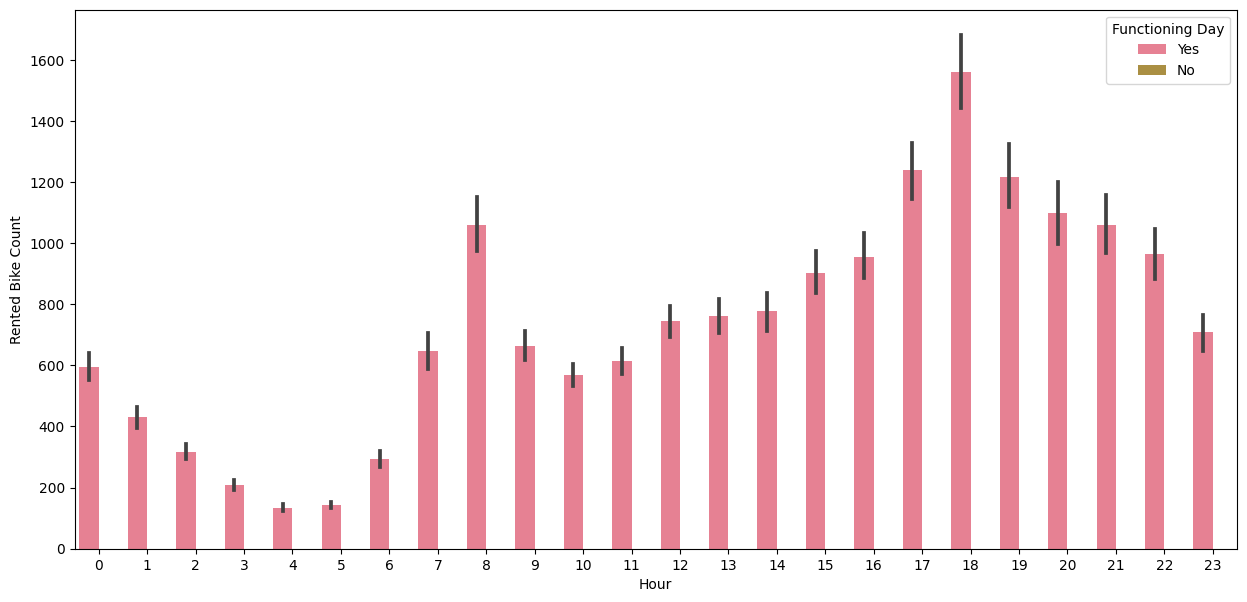

In [81]:
#for chech functioning and non functioning day ,plot (Hour Vs Rented Bike Count Graph)
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [82]:
# Grouping by functioning day and calculating the total Rented Bike Count
data.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,4374904
1,No,0


As per diagnosis data found that rental bike only given on Functioning Day,So remove Non Functioning Days and then remove Functioning Day Column Also

In [83]:
#Removing data of non functional days (non rented days)
df=data.drop(data[data['Functioning Day'] == 'No'].index) 

In [84]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
df1=df.drop(['Functioning Day'], axis = 1)

In [85]:
#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",df1.shape,"\n") 

Filtered Dataframe with only rented bike days : (5936, 14) 





### *2.2 _ Seperate Date, Month, Year from Date Column*

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [86]:
#convert in datetime64[ns] datatype
df1['Date'] = pd.to_datetime(df1['Date']) 
df1['Date']

0      2018-04-26
1      2018-02-04
2      2018-05-25
3      2018-08-04
4      2018-06-04
          ...    
6127   2018-06-16
6128   2018-07-19
6129   2018-03-06
6130   2018-05-08
6131   2018-11-11
Name: Date, Length: 5936, dtype: datetime64[ns]

In [87]:
#Seperate Day, Month, Year from DataFrame Column

df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year

In [88]:
# drop the Date column after extracting necessory information
df1.drop(columns=['Date'],inplace=True)

##**3. Exploratory Analysis and Visualization**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.


> We'll use libraries Matplotlib, Seaborn for visualization.




###*3.1 _ Checking Correlation Of Data*

Correlation is a statistical measure that expresses the strength of the relationship between two variables. 

The two main types of correlation : **positive and negative.** 

**Positive correlation** occurs when two variables move in the same direction; as one increases, so do the other.

**Negative correlation** occurs when two variables move in opposite directions; as one increases, the other decreases. 

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends.

<AxesSubplot:>

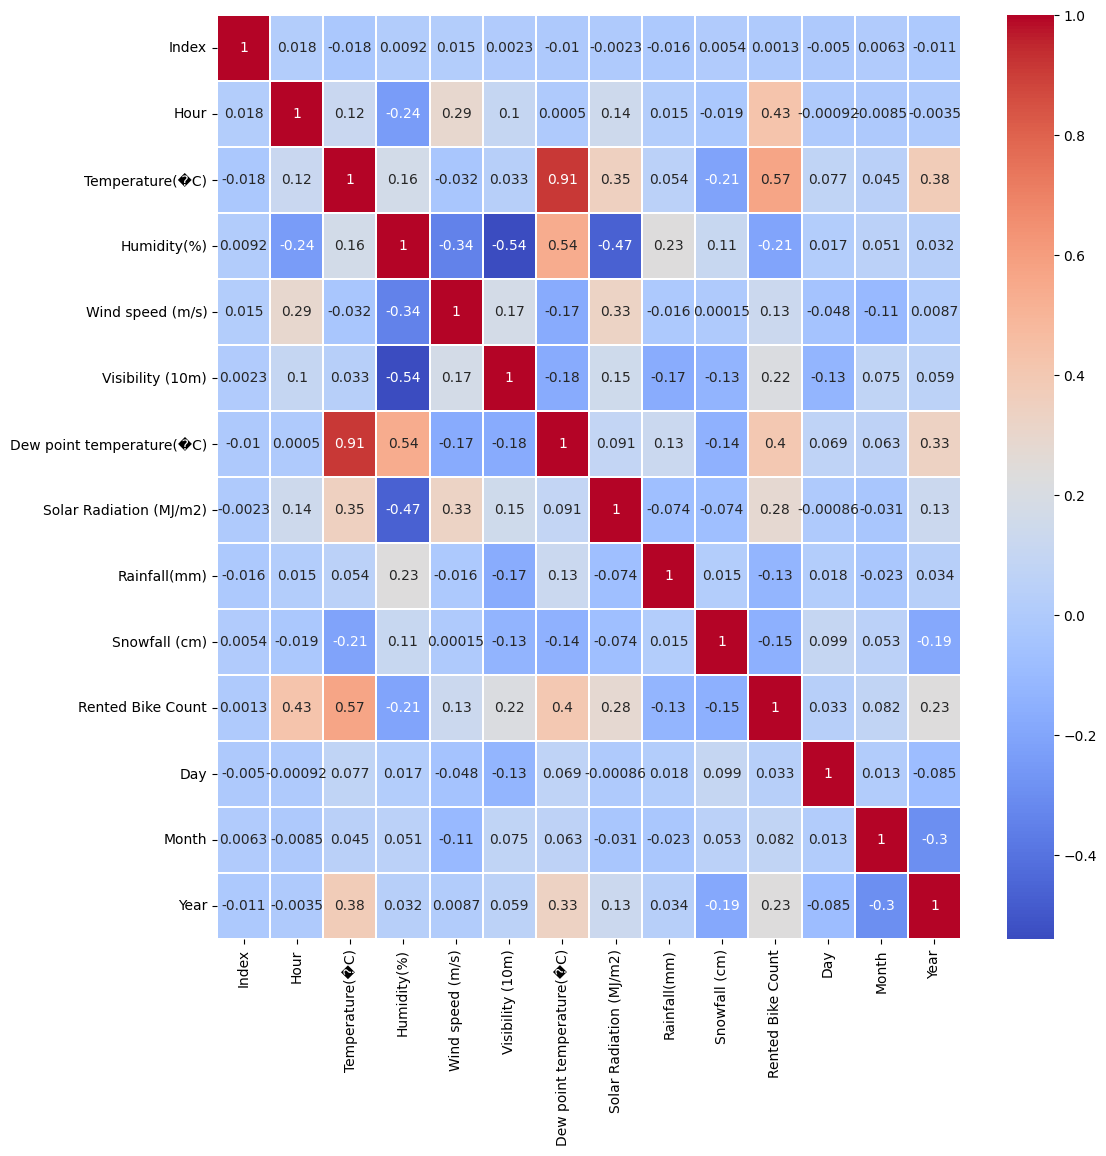

In [89]:
#.corr() use to find correlation with data
data_corr= df1.corr()       
plt.figure(figsize=(12,12))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells, 
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

`temperature` and `Dew point temperature` are almost 0.91 correlated, So it's generate multicollinearity issue. so we drop `Dew point temperature` feature

In [90]:
#Drop Dew point temperature(°C) from dataset df1
df1.drop(columns=['Dew point temperature(�C)'],inplace=True)  

Finding Insides:

1. We can see that with our targer variable (Rented Bike Count), the most correlated variables are : Hour, Temperature, Dew point temperature

###*3.2 _ Seperate Numerical And Categorical Variables*

Categorical data is a type of data that is used to group information with similar characteristics 

Numerical data is a type of data that expresses information in the form of numbers.

#### Numarical Variables

In [91]:
#if dtype is not Equal to object type then its a num data
numerical_features=[col for col in df1.columns if df1[col].dtype!='O']
numerical_features

['Index',
 'Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Rented Bike Count',
 'Day',
 'Month',
 'Year']

In [92]:
# Seprate dataframe for Numerical feature
num_data=df1[numerical_features]
num_data

,Index,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Day,Month,Year
0,0,5,10.2,73,0.8,1137,0.00,0.0,0.0,180,26,4,2018
1,1,7,15.1,80,1.0,623,0.01,0.0,0.0,918,4,2,2018
2,2,8,17.1,57,1.7,792,1.21,0.0,0.0,1996,25,5,2018
3,3,22,2.7,88,2.0,621,0.00,0.0,0.0,177,4,8,2018
4,4,17,6.3,50,4.4,707,0.64,0.0,0.0,776,4,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,6127,15,27.8,41,1.6,1851,2.89,0.0,0.0,1861,16,6,2018
6128,6128,22,28.0,76,1.5,1542,0.00,0.0,0.0,1870,19,7,2018
6129,6129,20,25.3,32,2.2,1997,0.06,0.0,0.0,2460,6,3,2018
6130,6130,22,29.1,77,3.0,1559,0.00,0.0,0.0,1286,8,5,2018


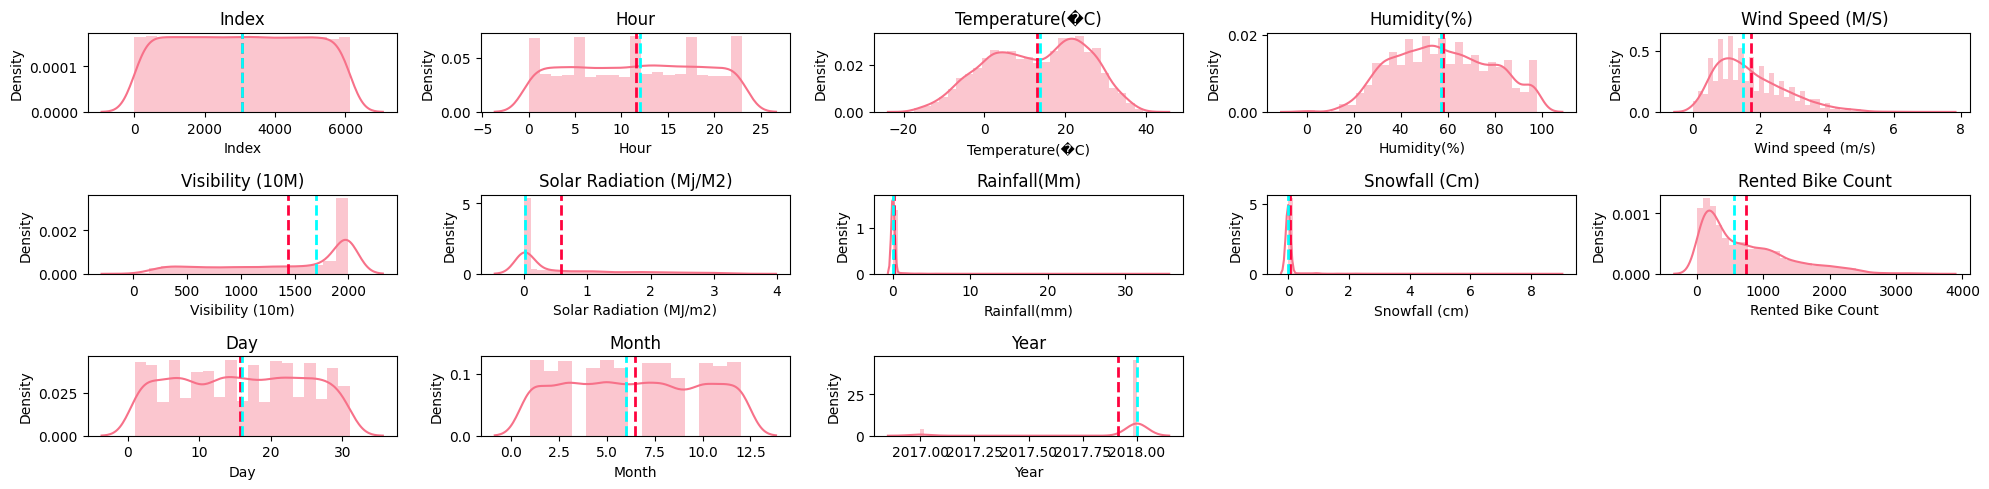

In [93]:
#plot num data to analysis data distribution
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
  plt.subplot(3,5,index+1)
  sns.distplot(df1[column])
  feature = df1[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')
  plt.tight_layout()

In [94]:
df1.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Index,0.003853,-1.198815
Hour,-0.012091,-1.197617
Temperature(�C),-0.183301,-0.894850
Humidity(%),0.079361,-0.829147
Wind speed (m/s),0.884449,0.645805
Visibility (10m),-0.703472,-0.956589
Solar Radiation (MJ/m2),1.479542,1.050877
Rainfall(mm),14.207915,265.963815
Snowfall (cm),8.495803,92.238584
Rented Bike Count,1.100350,0.708302



Right/Positive Skewed Distribution: Mode < Median < Mean: Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)


Left/Negative Skewed Distribution: Mean < Median < Mode: visibility(10m)

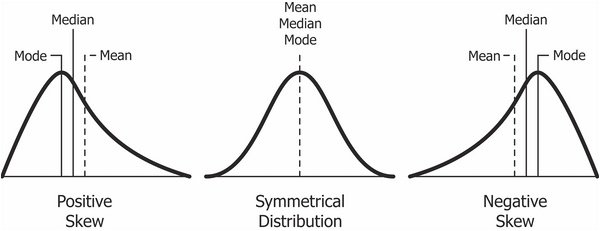

#####Discrete Values

Discrete Variables Count: 4


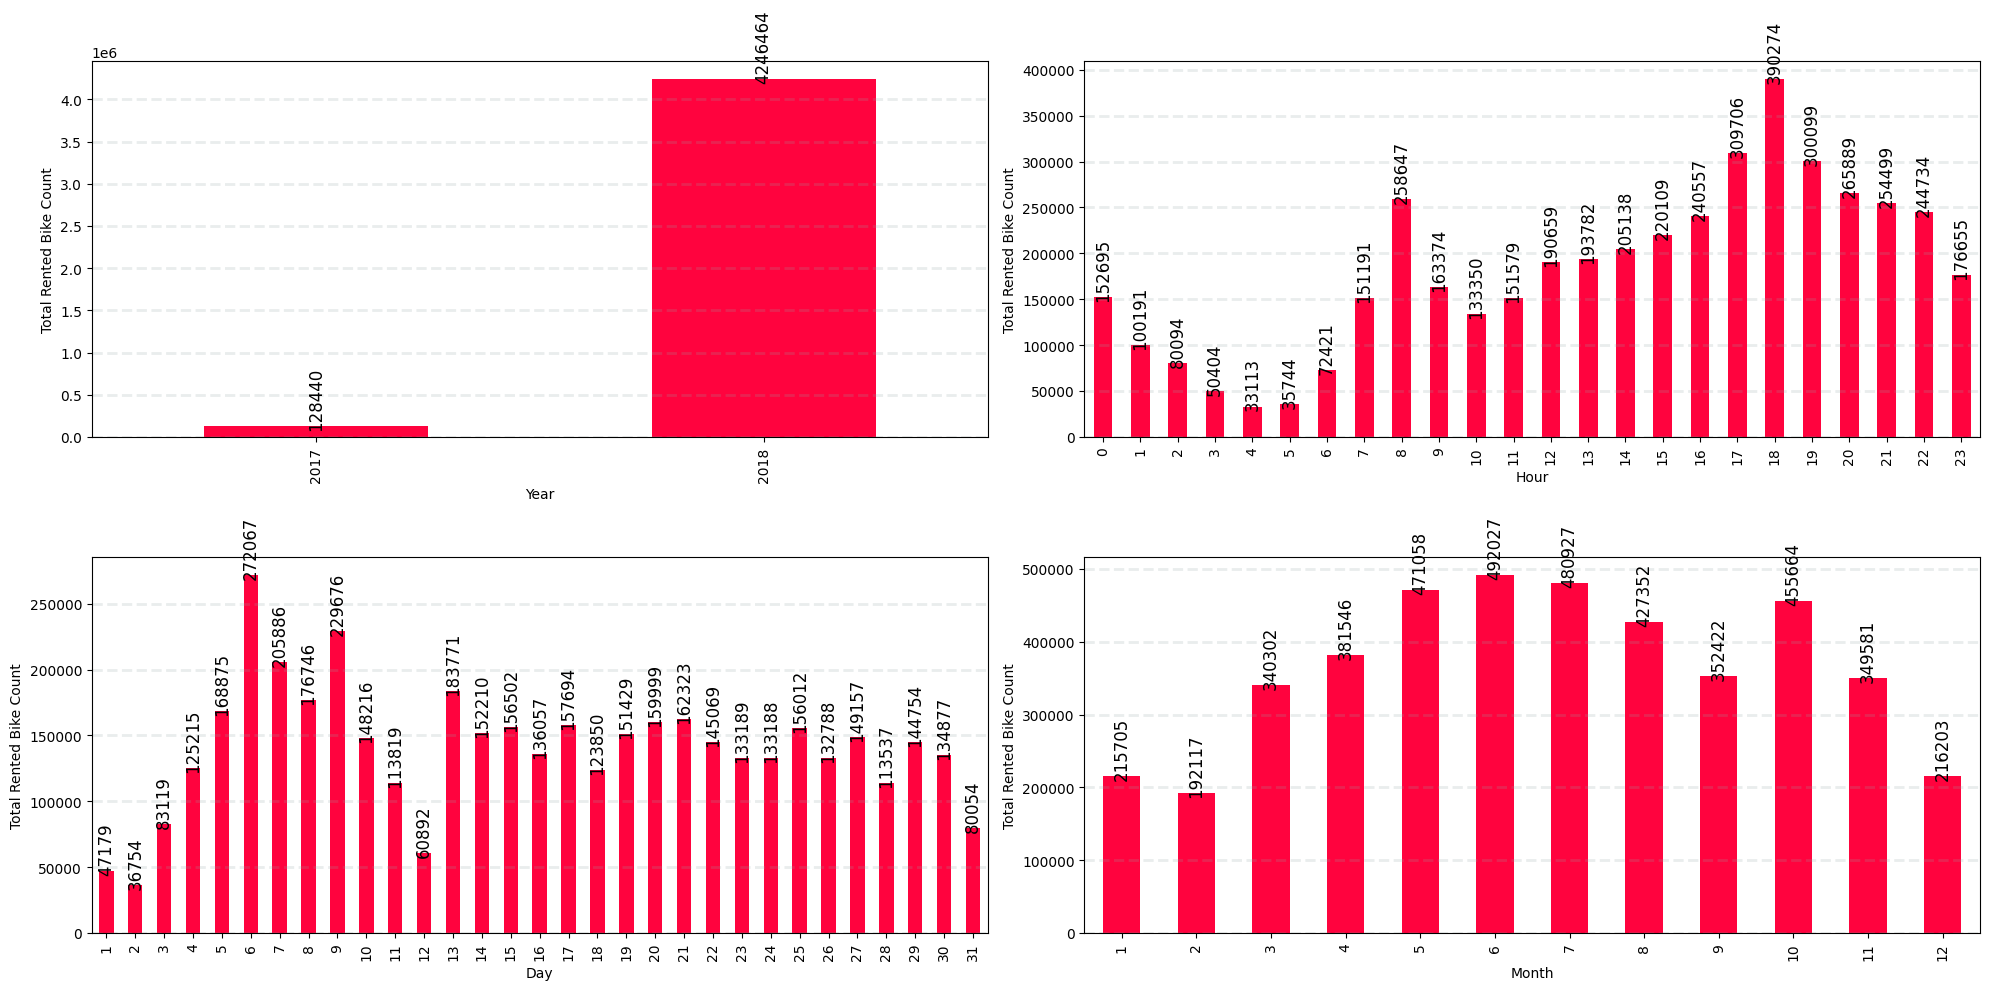

In [95]:
## Lets analyse the discrete values by creating histograms to understand the distribution
num_discrete_value=[feature for feature in numerical_features if len(df1[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(2,2,index+1)
  dataset=df1.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e") #kind=bar use for ploting barchart
  feature = df1[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90) #ha use to write count in center and rotation use to rotate count to 90 degree and make clear visible on graph

#### Categorical Variables

In [96]:
#For categorical Data
categorical_features=[col for col in df1.columns if df1[col].dtype=='O']
categorical_features

['Seasons', 'Holiday']

In [97]:
# Seprate dataframe for Categorical feature
cat_data=df1[categorical_features]

In [98]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2


In [99]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,1618697
1,Autumn,1261856
2,Spring,1154219
3,Winter,340132


In [100]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,4218130
1,Holiday,156774


##### Categorical Values

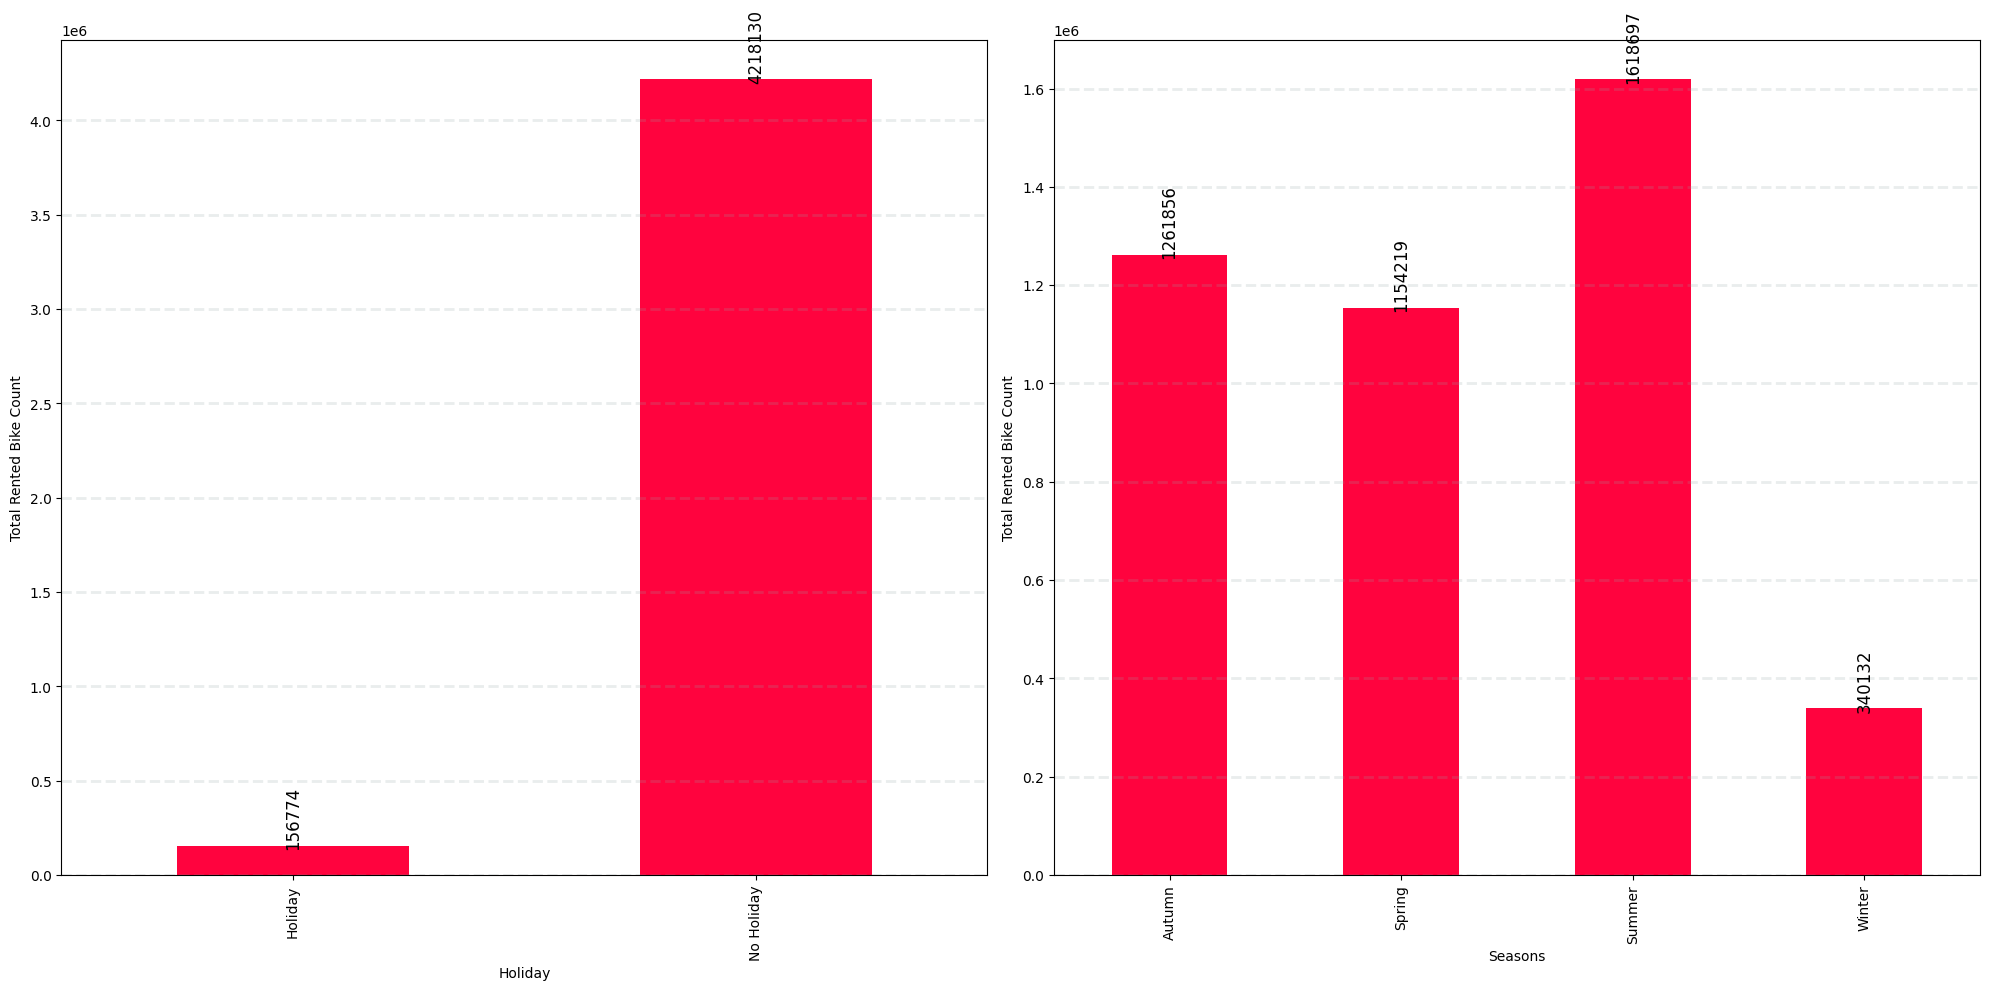

In [101]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(categorical_features) :
    plt.subplot(1,2,index+1)
    dataset=df1.copy()
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e")
    feature = df1[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)


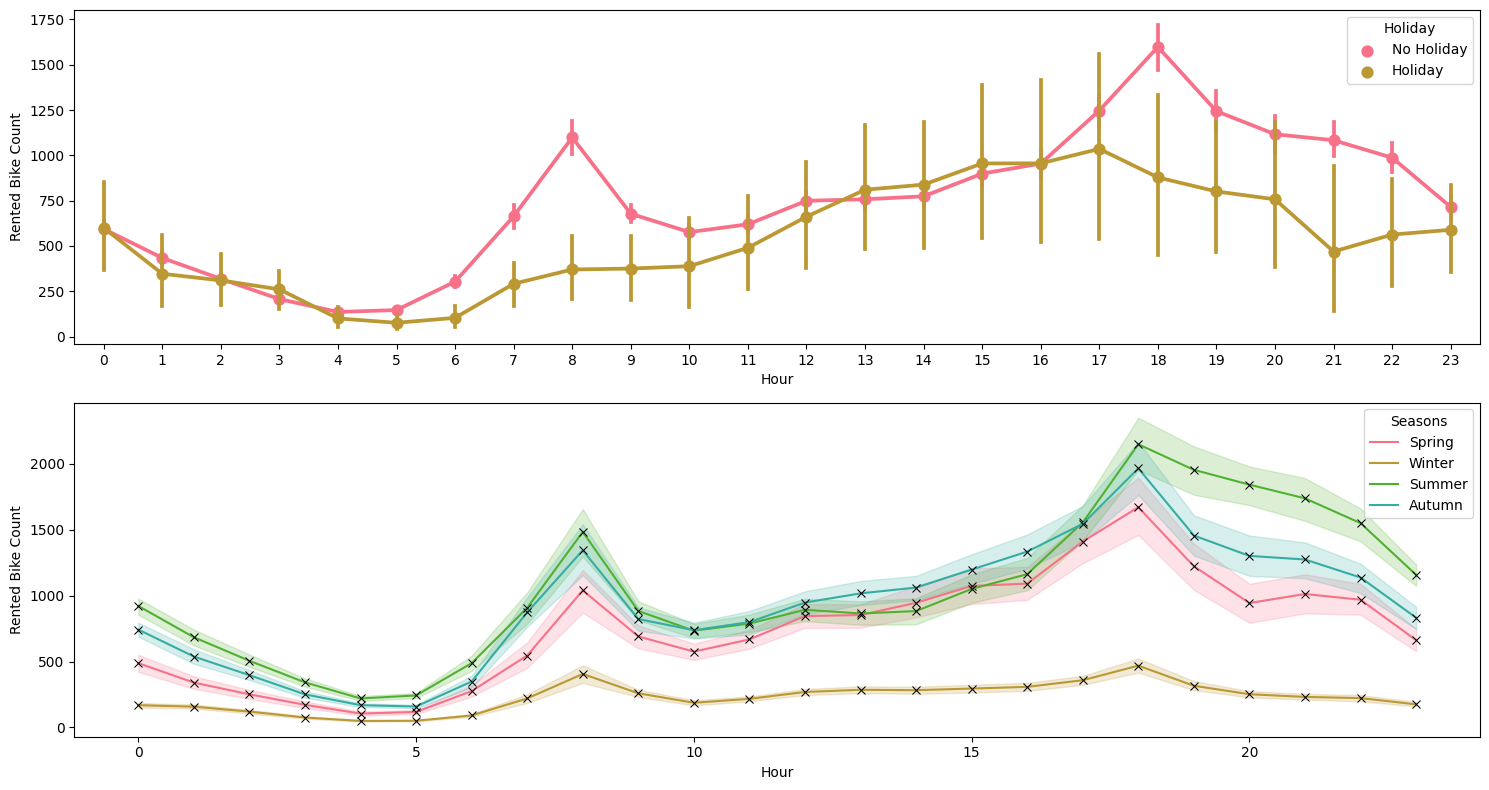

In [102]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0], 
              hue="Holiday")
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

## **4. Feature Engineering On Data**


1. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
2. Identify Inputs and Target
3. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
4. Split the dataset into training and validation sets.


### *4.1 _ Encoding Data*

Encode categorical data in both encoder and check accuracy of encoders:
1. oh_df : OneHotEncoder Data 
2. le_df : LabelEncoder Data 

####4.1.1 _ Apply OneHotEncoder on Data



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [103]:
#oh_df=pd.get_dummies(df1, columns=['Seasons', 'Holiday'], drop_first=True)
#oh_df

One-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. So for columns with more unique values try using other techniques like LabelEncoding

#### 4.1.2 _ Apply LabelEncoder

In [104]:
# Encode labels of multiple columns at ones using LabelEncoder
le_df= df1.apply(LabelEncoder().fit_transform)
le_df

,Index,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count,Day,Month,Year
0,0,5,260,63,8,865,0,0,0,1,1,176,25,3,1
1,1,7,309,70,10,439,1,0,0,1,1,876,3,1,1
2,2,8,329,47,17,576,121,0,0,1,1,1682,24,4,1
3,3,22,185,78,20,437,0,0,0,1,1,173,3,7,1
4,4,17,221,40,44,509,64,0,0,1,1,750,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,5931,15,436,31,16,1491,289,0,0,2,1,1602,15,5,1
6128,5932,22,438,66,15,1213,0,0,0,2,1,1608,18,6,1
6129,5933,20,411,22,22,1636,6,0,0,2,1,1884,5,2,1
6130,5934,22,449,67,30,1230,0,0,0,2,1,1212,7,4,1


Checking Season Column Data

In [105]:
df1.groupby("Seasons").count()  #for checking raw data

,Index,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Rented Bike Count,Day,Month,Year
Seasons,,,,,,,,,,,,,,
Autumn,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
Spring,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534
Summer,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546
Winter,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492


In [106]:
le_df.groupby('Seasons').count() #Seasons convert to numerical after apply transformation on data

,Index,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Rented Bike Count,Day,Month,Year
Seasons,,,,,,,,,,,,,,
0,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
1,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534,1534
2,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546,1546
3,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492


0 : Autumn , 1 : Spring , 2 : Summer , 3 : Winter

### **Checking Ditrubutation and Outliner on DataFrame**

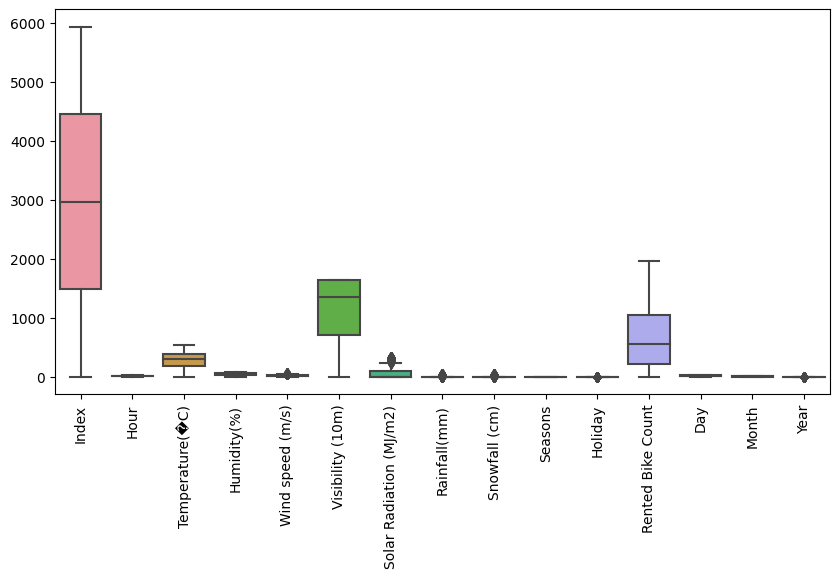

In [107]:
#checking for outliers
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = le_df)    #box plot of le_df data frame raw data
plt.show()

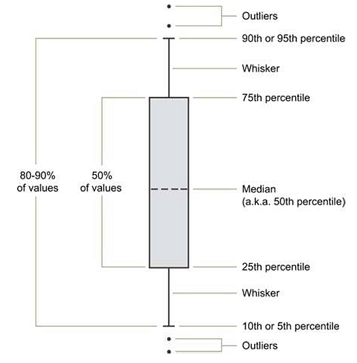

Target Parameter `Rented Bike Count` distributation analysis

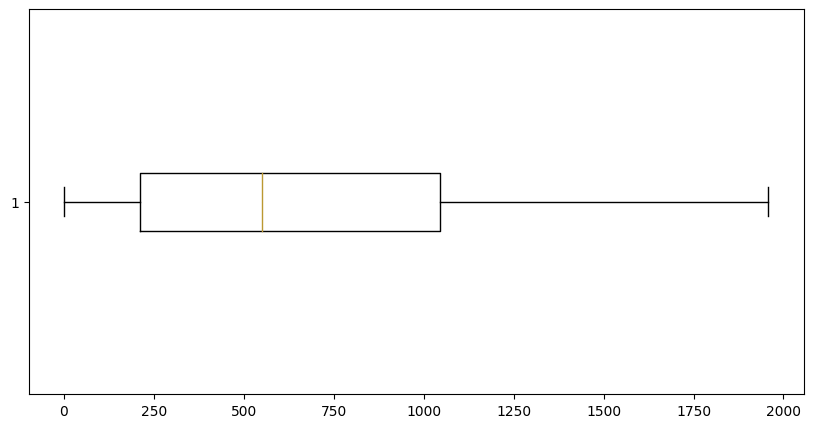

In [110]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df['Rented Bike Count'],vert=False)
plt.show()

<html>
<img src="https://www.bing.com/images/blob?bcid=r98YVgaOwa0E7FwdButDi0d2CB-M.....zE" width="600" height="400" alt="bike">
</html>

Outline detection using Interquartile Range

**Square Root**
The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is  a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

Square Root Transformation: Transform the values from y to √y.

-----------------------------------------------------------------


**Log Transformation**
The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.

Log Transformation: Transform the values from y to log(y).

--------------------------------------------------------------------


**Cube root transformation** involves converting x to x^ (1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data

Cube Root Transformation: Transform the values from y to y^(1/3).

Text(0.5, 1.0, 'cube root')

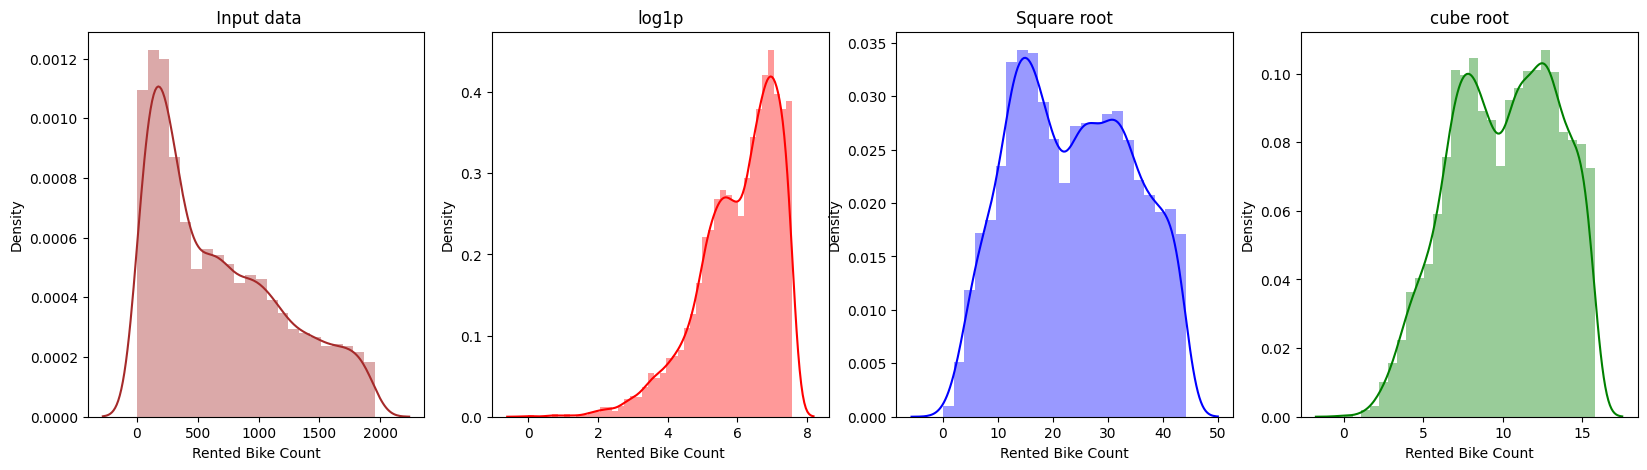

In [111]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((le_df['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(le_df['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(le_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(le_df['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

In [112]:
import scipy.stats as stats

In [113]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()


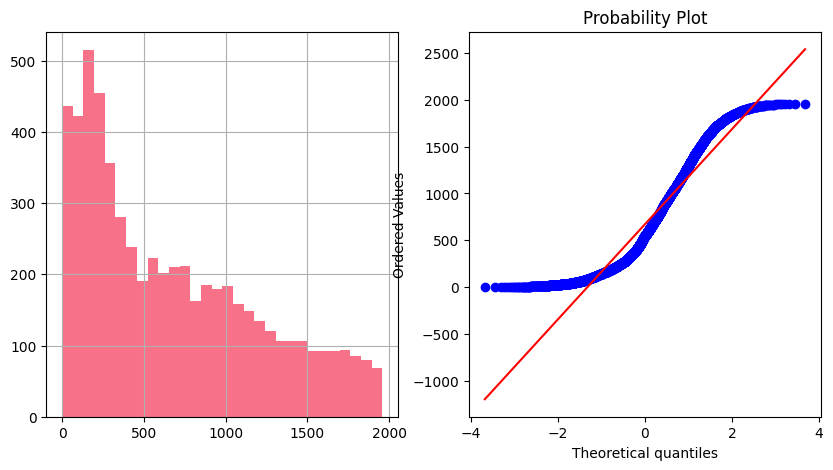

In [114]:
plotvariable(le_df,'Rented Bike Count')

our `Rented Bike Count` target is not normally distributed ,so we need to make some transformations before supply to the model

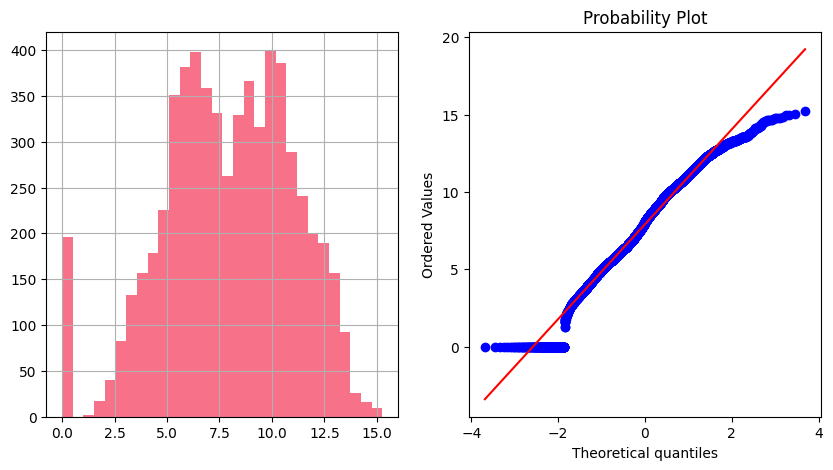

In [115]:
data["RBC_qb"]=np.cbrt(data['Rented Bike Count']) #try cube root technique to convert positive screwd to normal distributation

plotvariable(data,"RBC_qb")

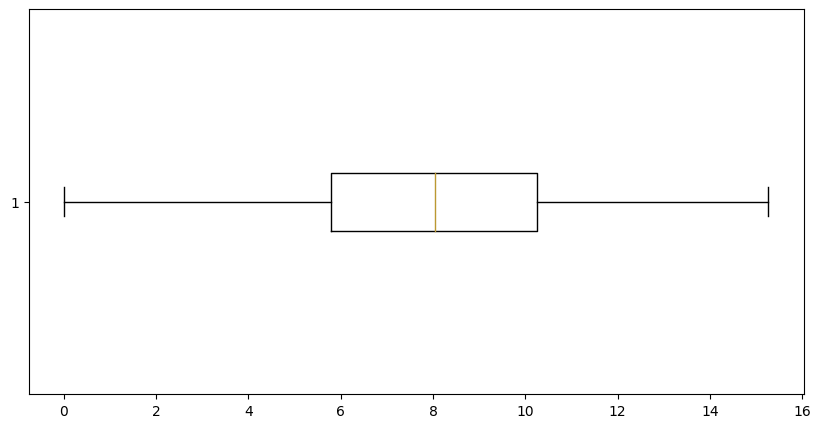

In [116]:
plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_qb"],vert=False)
plt.show()

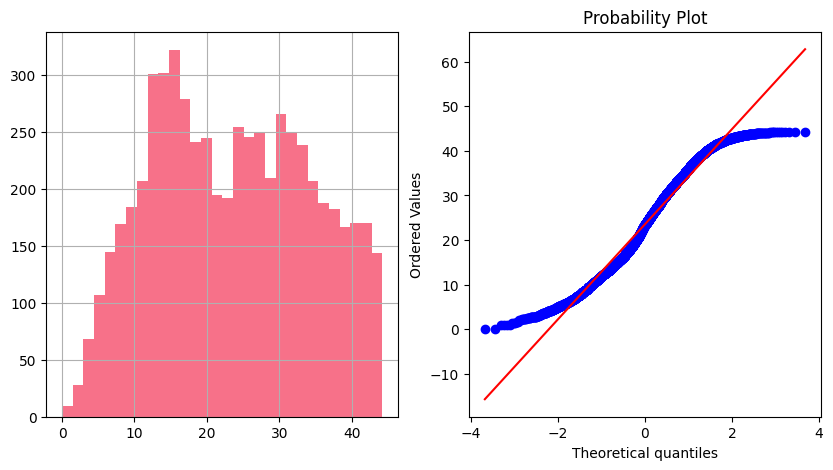

In [117]:
le_df['Rented Bike Count']=np.sqrt(le_df['Rented Bike Count'])

plotvariable(le_df,'Rented Bike Count')

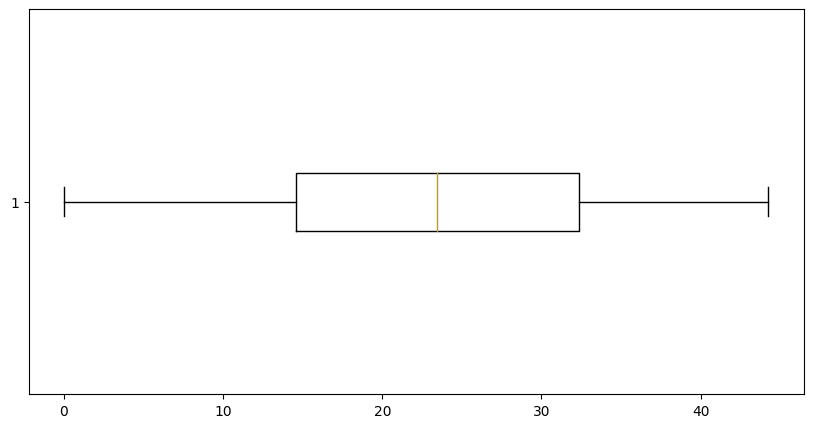

In [118]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df["Rented Bike Count"],vert=False)
plt.show()



Now, Its Look Like Normal Distributation

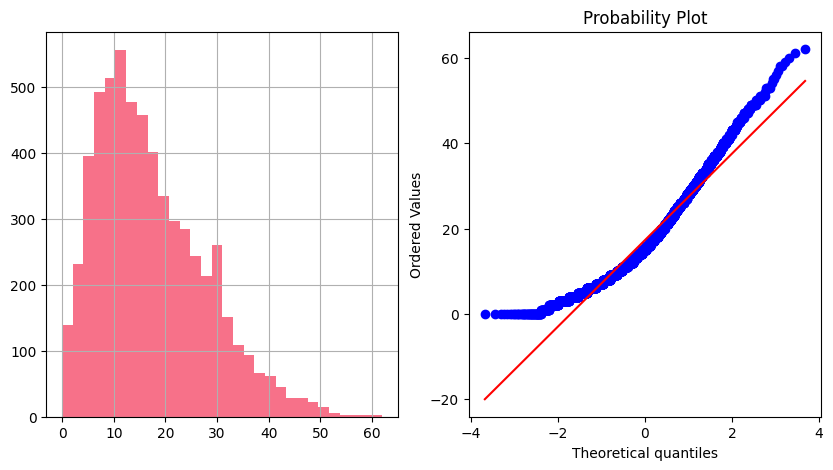

In [119]:
plotvariable(le_df,'Wind speed (m/s)')

not look like normal and right screwed distributation so need to apply transformation

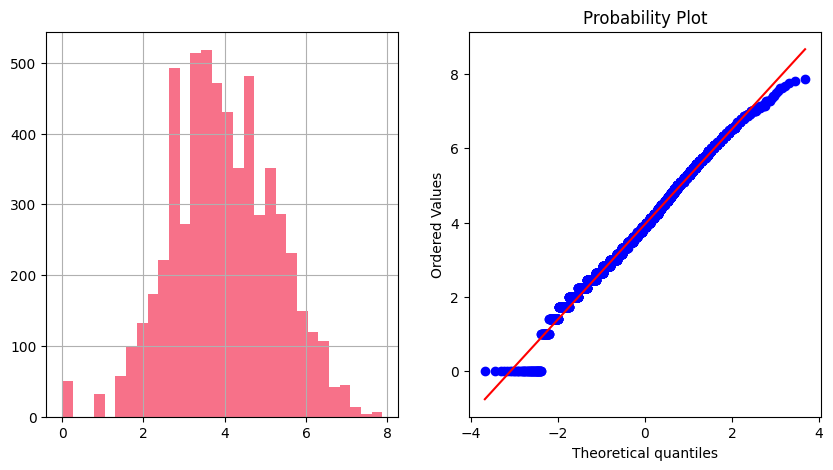

In [120]:
le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

plotvariable(le_df,'Wind speed (m/s)')

look like a normal distribution.

### *4.2 _ Identify Inputs and Targets*

- The column `Rented Bike Count` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

>Create a list `X` of column names containing data that can be used as input to train the model, and identify the target column as the variable `y`.

>Make sure that the `Date` and `Rented Bike Count` columns are not included in `X`.

Now that we've identified the input and target columns, we can separate input & target data.

In [121]:
# Identify the input columns (a list of column names)

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

### *4.3 _ Spliting Training and Testing Set*
Finally, let's split the dataset into a training and testing set. We'll use a randomly select 30% subset of the data for validation. Also, we'll use just the numeric and encoded columns.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [123]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (4748, 14), X_test = (1188, 14)
The shape of the train and test set for the dependent variables are : y_train = (4748,), y_test = (1188,)


## **5. Scaling Data and Model Building Using Various Regression Techniques**

Regression searches for relationships among variables. 

The dependent features are called the dependent variables, outputs, or responses. 

The independent features are called the independent variables, inputs, regressors, or predictors.

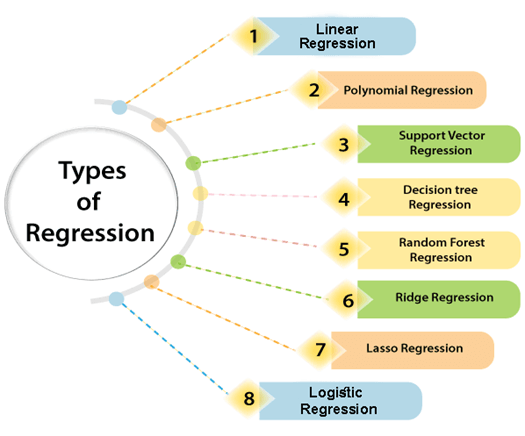

**Different Models Accuracy Checking Using Robust Scaler**

In [124]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    

**R2** shows how well terms (data points) fit a curve or line. 
**Adjusted R2** also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.

Adjusted R2 will always be less than or equal to R2.



**R2** assumes that every single variable explains the variation in the dependent variable. 

**The adjusted R2** tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

<html>
<img src="https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG" height="600" width="600" alt="bike">
</html>




**MSE** is a risk function that allows us to calculate the average squared difference between a feature’s or variable’s predicted and actual value.

**RMSE** is an abbreviation for Root Mean Square Error, which is the square root of the value obtained from the Mean Square Error function.

**Linear Regression :**

<html>
<img src="https://miro.medium.com/max/2600/1*2ZnDb5b6UtBZ41Wy90MTkw.jpeg" height="300" width="600" alt="bike">
</html>

Here is multiple dependent variables, So its call a multiple linear regression



<html>
<img src="https://miro.medium.com/max/1160/1*Jfx203VYFtcM958gbFsiXA.png" height="300" width="600" alt="bike">
</html>

R^2 is 0.6651382857769977
 Adj R^2 is 0.6611416412764675
 RMSE is: 6.268554619419732


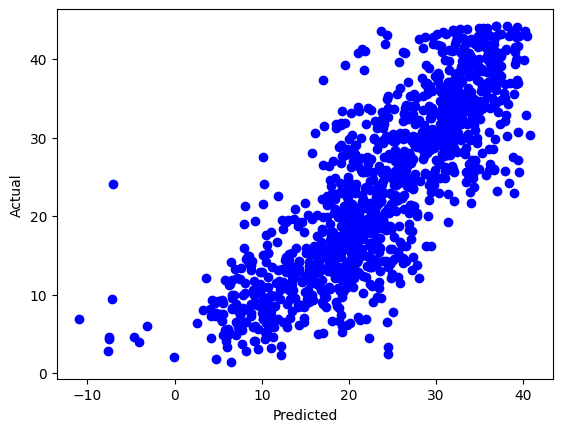

In [125]:
predict(LinearRegression(),X,y)

**Decision Tree Regressor :**

<html>
<img src="https://user-images.githubusercontent.com/49559408/66479235-186a5200-ead7-11e9-8d4c-2389faa853bd.PNG" height="250" width="600" alt="bike">
</html>



R^2 is 0.8099643699007516
 Adj R^2 is 0.8076962549635057
 RMSE is: 4.722284888166847


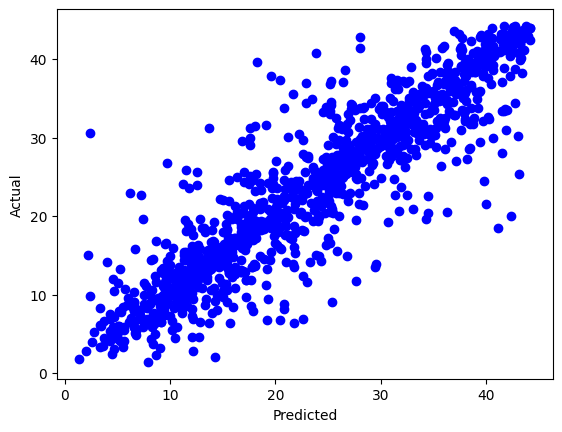

In [126]:
predict(DecisionTreeRegressor(),X,y)

**Random Forest Regressor:**

<html>
<img src="https://miro.medium.com/max/1376/1*yp3XJHsgRGcnh26Ndi7dxA.png" height="250" width="600" alt="bike">
</html>



R^2 is 0.9052363522482102
 Adj R^2 is 0.9041053283193738
 RMSE is: 3.3346906446022095


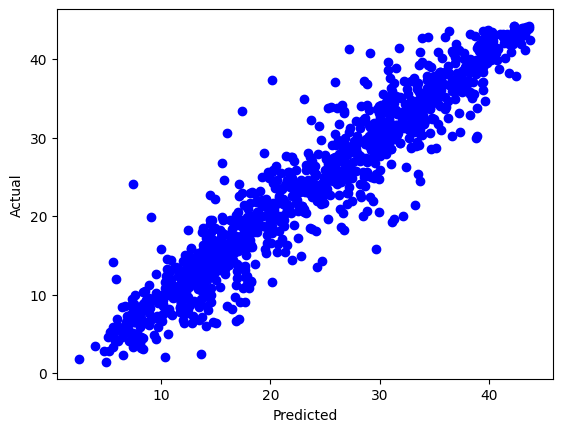

In [127]:
predict(RandomForestRegressor(),X,y)

<html>
<img src="https://rohitgr7.github.io/content/images/2019/03/Screenshot-from-2019-03-27-23-09-47-1.png" height="250" width="600" alt="bike">
</html>



R^2 is 0.9146920141980217
 Adj R^2 is 0.9136738455695241
 RMSE is: 3.163949260853179


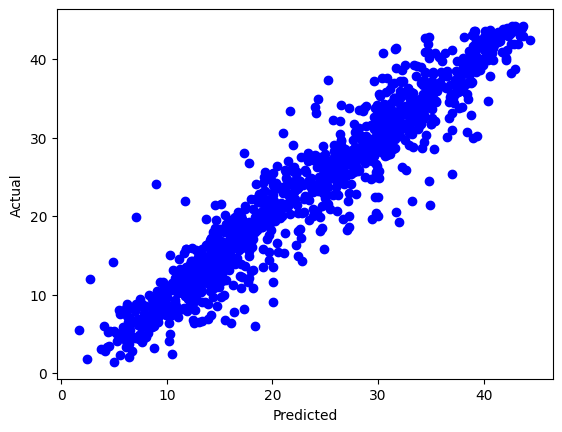

In [128]:
predict(LGBMRegressor(),X,y)

**Models Accuracy Checking Using MinMaxScaler**

In [129]:
def predict_mm(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    mm =MinMaxScaler()

    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    

R^2 is 0.6651382857769975
 Adj R^2 is 0.6611416412764672
 RMSE is: 6.268554619419733


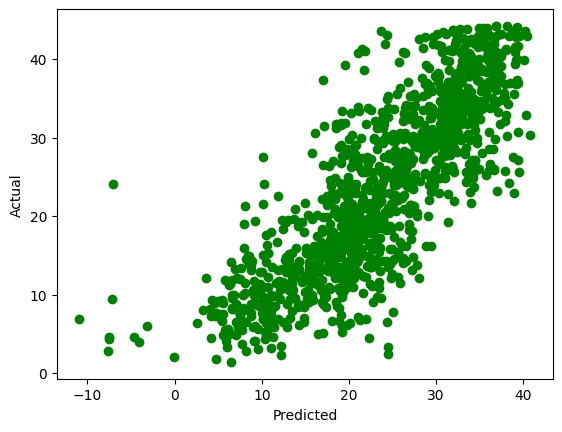

In [130]:
predict_mm(LinearRegression(),X,y)

R^2 is 0.8145817986255232
 Adj R^2 is 0.812368793664532
 RMSE is: 4.664561766508321


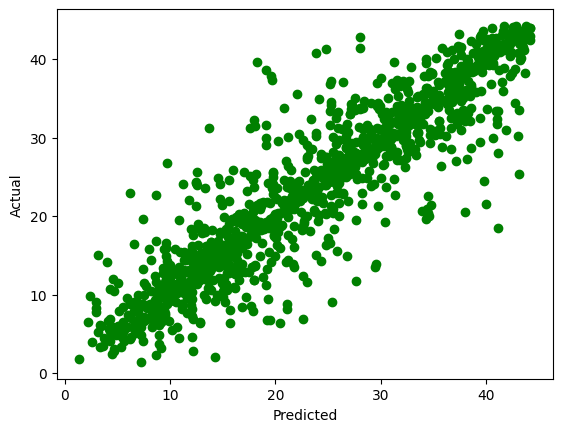

In [131]:
predict_mm(DecisionTreeRegressor(),X,y)

R^2 is 0.9066027553983899
 Adj R^2 is 0.9054880397765462
 RMSE is: 3.310561790141922


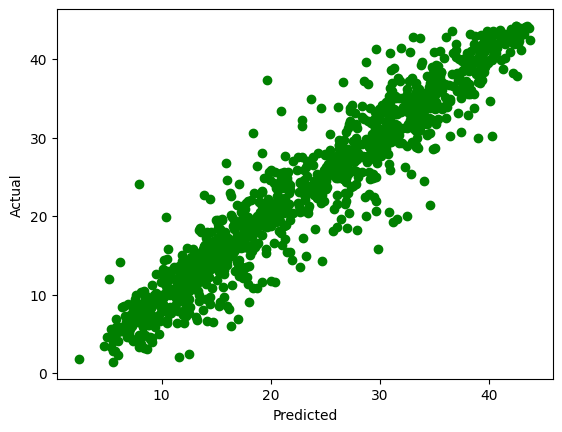

In [132]:
predict_mm(RandomForestRegressor(),X,y)

R^2 is 0.912981341924757
 Adj R^2 is 0.9119427560653764
 RMSE is: 3.195514975018793


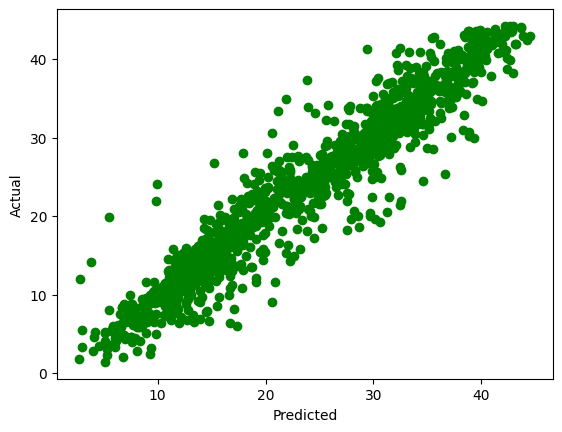

In [133]:
predict_mm(LGBMRegressor(),X,y)

**Models Accuracy Checking Using Standard Scaler**

In [134]:
def predict_ss(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    ss =StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)} \n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    pred_y_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
    print(pred_y_df[0:10])

Checking Actual value and Predicated value with it's differenace 

R^2 is 0.6651382857769974 
 Adj R^2 is 0.6611416412764671
 RMSE is: 6.268554619419735
      Actual Value  Predicted Value  Difference
3676     41.964271        32.152724    9.811547
3260      8.246211        18.909144  -10.662933
4807     24.041631        10.308744   13.732887
5819     34.438351        31.425990    3.012361
3767     39.344631        39.028813    0.315818
6103      7.211103         4.642702    2.568401
5931      9.899495        15.718967   -5.819472
3991     18.734994        24.720794   -5.985800
3003     10.488088         9.108355    1.379734
4877     12.288206        25.659058  -13.370852


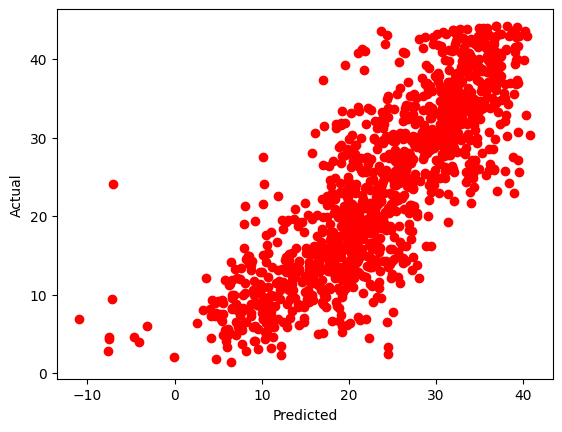

In [135]:
predict_ss(LinearRegression(),X,y)

R^2 is 0.8116348925818582 
 Adj R^2 is 0.8093867156817269
 RMSE is: 4.7014832702074765
      Actual Value  Predicted Value  Difference
3676     41.964271        41.218928    0.745343
3260      8.246211         3.000000    5.246211
4807     24.041631        14.764823    9.276808
5819     34.438351        29.034462    5.403888
3767     39.344631        39.648455   -0.303824
6103      7.211103         6.928203    0.282899
5931      9.899495        14.933185   -5.033690
3991     18.734994        21.725561   -2.990567
3003     10.488088         4.690416    5.797673
4877     12.288206        18.841444   -6.553238


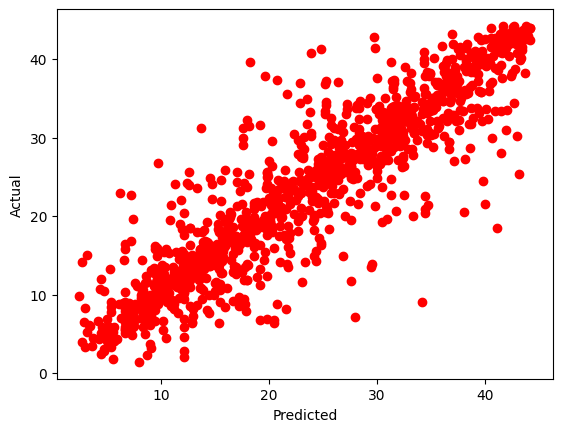

In [136]:
predict_ss(DecisionTreeRegressor(),X,y)

R^2 is 0.9049914753633426 
 Adj R^2 is 0.9038575287777388
 RMSE is: 3.338996419148759
      Actual Value  Predicted Value  Difference
3676     41.964271        41.092422    0.871848
3260      8.246211         8.086536    0.159675
4807     24.041631        17.620088    6.421543
5819     34.438351        31.537536    2.900815
3767     39.344631        39.237755    0.106876
6103      7.211103         7.084002    0.127101
5931      9.899495        13.320175   -3.420680
3991     18.734994        19.583126   -0.848132
3003     10.488088         8.122220    2.365868
4877     12.288206        18.269838   -5.981632


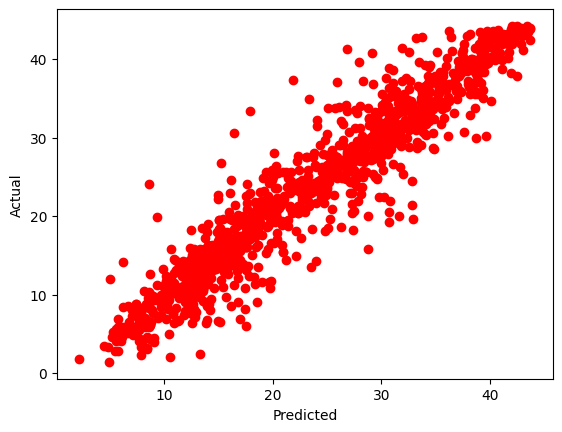

In [137]:
predict_ss(RandomForestRegressor(),X,y)

R^2 is 0.9125781252382899 
 Adj R^2 is 0.911534726903538
 RMSE is: 3.202909916686421
      Actual Value  Predicted Value  Difference
3676     41.964271        39.347926    2.616345
3260      8.246211         7.036691    1.209520
4807     24.041631        18.203467    5.838163
5819     34.438351        31.043792    3.394559
3767     39.344631        38.998408    0.346223
6103      7.211103         6.792731    0.418371
5931      9.899495        15.005502   -5.106007
3991     18.734994        18.268660    0.466334
3003     10.488088         8.898373    1.589716
4877     12.288206        17.302154   -5.013948


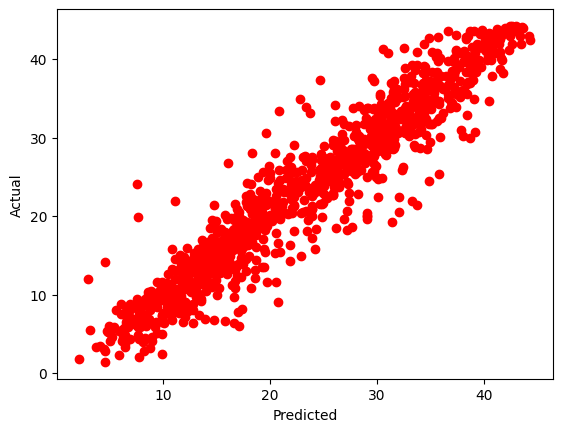

In [138]:
predict_ss(LGBMRegressor(),X,y)

In [139]:
import lightgbm
import time
from math import sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [140]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           neighbors.KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
           ['MLPRegressor: ', MLPRegressor(  activation='logistic', solver='sgd',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
]

In [141]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [142]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_Time': 0.0054662227630615234,
  'Train_R2_Score': 0.6640658172134137,
  'Test_R2_Score': 0.6276115880035945,
  'Test_RMSE_Score': 6.612337533748981},
 {'Name': 'Lasso: ',
  'Train_Time': 0.03712606430053711,
  'Train_R2_Score': 0.6519407761153366,
  'Test_R2_Score': 0.6186697830876415,
  'Test_RMSE_Score': 6.691254456904002},
 {'Name': 'Ridge: ',
  'Train_Time': 0.02222442626953125,
  'Train_R2_Score': 0.6640657317094071,
  'Test_R2_Score': 0.6276093312139726,
  'Test_RMSE_Score': 6.612357570129858},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.024233102798461914,
  'Train_R2_Score': 0.5876541634792802,
  'Test_R2_Score': 0.3527768886202216,
  'Test_RMSE_Score': 8.717339174813912},
 {'Name': 'SVR:',
  'Train_Time': 1.1355981826782227,
  'Train_R2_Score': 0.3414098274693793,
  'Test_R2_Score': 0.31753130458024215,
  'Test_RMSE_Score': 8.951551262145337},
 {'Name': 'DecisionTree ',
  'Train_Time': 0.02892613410949707,
  'Train_R2_Score': 1

#### Compare Models Accuracy 

In [143]:
df_all_model=pd.DataFrame(model_data)
df_all_model

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.005466,0.664066,0.627612,6.612338
1,Lasso:,0.037126,0.651941,0.618670,6.691254
2,Ridge:,0.022224,0.664066,0.627609,6.612358
3,KNeighborsRegressor:,0.024233,0.587654,0.352777,8.717339
4,SVR:,1.135598,0.341410,0.317531,8.951551
5,DecisionTree,0.028926,1.000000,0.771843,5.175752
6,RandomForest,1.759487,0.984248,0.887491,3.634549
7,ExtraTreeRegressor :,0.942433,1.000000,0.888395,3.619920
8,GradientBoostingRegressor:,0.623235,0.894303,0.867559,3.943371
9,XGBRegressor:,1.836614,0.986751,0.894418,3.520882


As per above results Train and Test R2 Score is nearby in good model.

Near 1 Score is very good model.

So, In above results best models are : 

|No|Model Name| Model Accuracy Score in % |
|--|----------|------------|
|6|	RandomForest|	88%|
|7|	ExtraTreeRegressor| 89%|
|8|	GradientBoostingRegressor|87%|
|9|	XGBRegressor|87%|
|10|	Light-GBM|90%|

## ***6. HyperParameter Tuning***
Apply on GradientBoostingRegressor Model and improve Accuracy of Model.

 Choose the best Hyperparameters

It’s a bit confusing to choose the best hyperparameters for boosting. But once you know how the boosting algorithms work, then you are able to choose it. Here are the best ones that I have chosen, learning_rate, max_depth, and the n_estimators. The max_depth and n_estimators are also the same parameters we chose in a random forest. Here we are taking an extra that is the learning_rate.

Call the Boosting regressor constructor and define the parameters.
Here you will make the list of all possibilities for each of the Hyperparameters.

In [144]:
gbr = GradientBoostingRegressor()
gbr_params = {
    "n_estimators":[250,500,1000],
    "max_depth":[2,4,6],
    "learning_rate":[0.01,0.1,1],
    "loss": ['ls','huber','quantile'],
}

In [145]:
regressor = GridSearchCV(gbr, gbr_params, verbose=1,cv=3,n_jobs=-1) 
regressor.fit(X_train,y_train) 

#it's take around 26min _ take a tea break

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/home/adisri/.virtualenvs/v39/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/home/adisri/.virtualenvs/v39/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/home/adisri/.virtualenvs/v39/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/home/adisri/.virtualenvs/v39/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/home/adisri/.virtualenvs/v39/lib/python3.9/site-packages/sklearn/en

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['ls', 'huber', 'quantile'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [250, 500, 1000]},
             verbose=1)

view selected best parameter by model

In [146]:
regressor.best_params_        #view selected best parameter by model

{'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 6, 'n_estimators': 1000}

In [147]:
regressor.best_estimator_     

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=6,
                          n_estimators=1000)

In [148]:
predictions = regressor.predict(X_test) 

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )
 

Root Mean Squared Error is 3.6025 


**Now apply best selected paramter and checking result**

In [150]:
X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 10,
          'learning_rate': 0.1,
          'loss': 'huber'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )
 

Model Accuracy: 0.891
The mean squared error (MSE) on test set: 12.7723
Root Mean Squared Error is 3.6025 


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Using Hyperperameters tuning, Improve accurecy of model from 87% to **91%**
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

4.2 Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.



In [151]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#

# step-3: perform grid search
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor()
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
rfe = RFE(gbr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [152]:
model_cv.best_params_    

{'n_features_to_select': 13}

In [153]:
model_cv.best_estimator_     

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=13)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

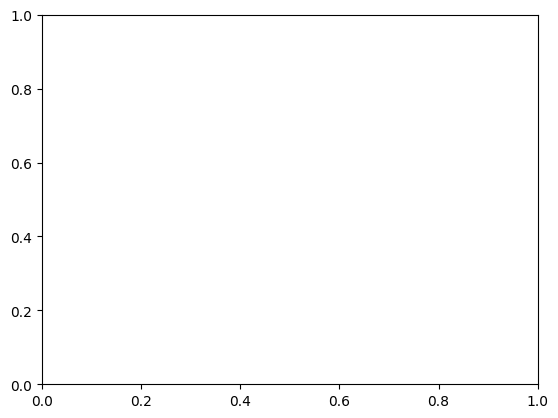

In [155]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# fit model no training data
model = XGBRegressor()
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()

In [156]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.112521,0.100210,0.002934,0.000522,1,{'n_features_to_select': 1},0.369697,0.437651,0.408007,0.326340,0.366181,0.381575,0.038137,13,0.420109,0.401399,0.411295,0.428495,0.421405,0.416541,0.009339
1,4.186395,0.267515,0.003945,0.001187,2,{'n_features_to_select': 2},0.672682,0.713195,0.683087,0.624083,0.632387,0.665087,0.033005,12,0.691533,0.681757,0.687781,0.701918,0.701333,0.692865,0.007806
2,3.987656,0.140375,0.003162,0.000472,3,{'n_features_to_select': 3},0.824120,0.831634,0.846284,0.816551,0.815447,0.826807,0.011350,11,0.850959,0.846852,0.844590,0.849284,0.851281,0.848593,0.002544
3,3.609040,0.074451,0.003245,0.000162,4,{'n_features_to_select': 4},0.851160,0.857773,0.869942,0.821657,0.844332,0.848973,0.016060,10,0.870271,0.867525,0.863290,0.875554,0.871863,0.869700,0.004126
4,3.407968,0.063977,0.002842,0.000239,5,{'n_features_to_select': 5},0.864656,0.871521,0.888278,0.851488,0.862839,0.867756,0.012114,9,0.886890,0.885820,0.882117,0.888839,0.887976,0.886328,0.002338
5,3.231915,0.063620,0.003174,0.000468,6,{'n_features_to_select': 6},0.864291,0.874091,0.888857,0.854058,0.864327,0.869125,0.011725,8,0.887784,0.887686,0.884669,0.891559,0.890545,0.888449,0.002424
6,2.981080,0.065539,0.003033,0.000328,7,{'n_features_to_select': 7},0.864113,0.876234,0.892649,0.855165,0.866177,0.870867,0.012786,7,0.892121,0.890392,0.887504,0.894506,0.893079,0.891520,0.002413
7,2.739342,0.072604,0.003600,0.000853,8,{'n_features_to_select': 8},0.866159,0.878053,0.894618,0.860780,0.869280,0.873778,0.011830,6,0.892993,0.892511,0.890853,0.896412,0.895668,0.893687,0.002061
8,2.461461,0.061078,0.003384,0.000822,9,{'n_features_to_select': 9},0.868382,0.879042,0.895988,0.861819,0.868020,0.874650,0.012021,2,0.896900,0.893858,0.893135,0.899209,0.895351,0.895691,0.002184
9,2.135926,0.048679,0.002802,0.000249,10,{'n_features_to_select': 10},0.870372,0.876518,0.892988,0.863960,0.867540,0.874276,0.010219,4,0.897618,0.892503,0.891406,0.899597,0.897022,0.895629,0.003138


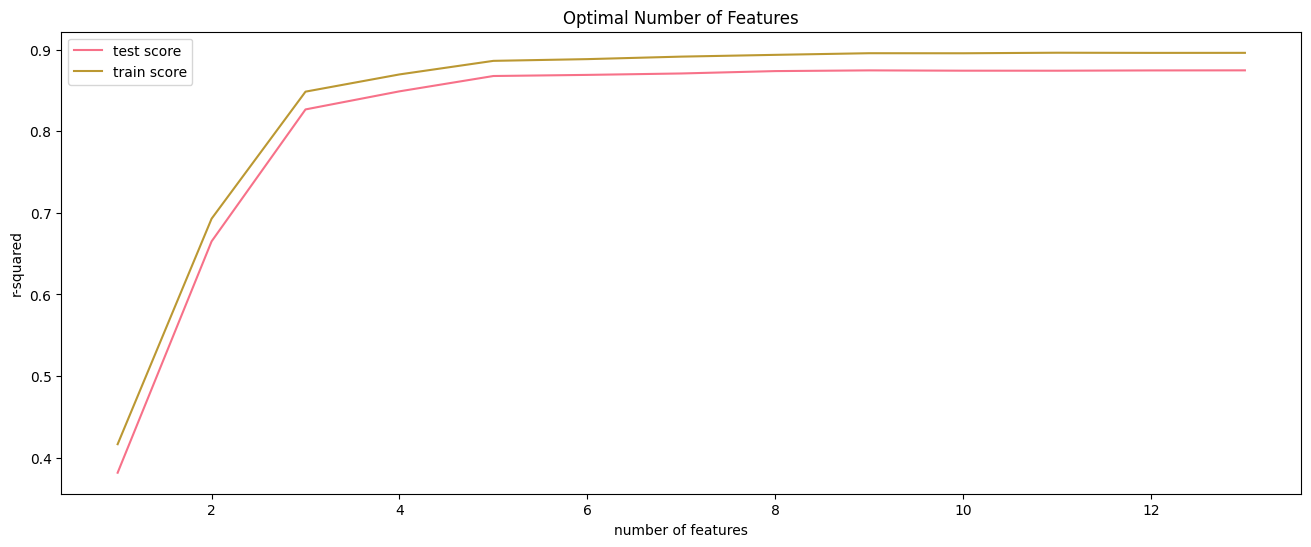

In [157]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')